# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-retardadores" data-toc-modified-id="Determinación-de-los-parámetros-de-los-retardadores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los retardadores</a></div><div class="lev2 toc-item"><a href="#Parte-experimental" data-toc-modified-id="Parte-experimental-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parte experimental</a></div><div class="lev2 toc-item"><a href="#Parte-numérica" data-toc-modified-id="Parte-numérica-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parte numérica</a></div><div class="lev2 toc-item"><a href="#Ajuste-sencillo" data-toc-modified-id="Ajuste-sencillo-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ajuste sencillo</a></div><div class="lev2 toc-item"><a href="#Definición-de-funcion-de-ajuste" data-toc-modified-id="Definición-de-funcion-de-ajuste-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Definición de funcion de ajuste</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---2:-completo" data-toc-modified-id="Fitting-to-matrices---2:-completo-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Fitting to matrices - 2: completo</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---2:-solo-angulos" data-toc-modified-id="Fitting-to-matrices---2:-solo-angulos-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Fitting to matrices - 2: solo angulos</a></div>

# Determinación de los parámetros de los retardadores

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   12/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1 Thorlabs LPNIRE100-B.
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Polarizador 4 Thorlabs LPNIRE100-B.




**Procedimiento**:

Se conocen los parámetros y ángulos de P1 y P4.

1. Se interpone la lámina retardadora R2

1. Se deja P1 en un ángulo fijo.

1. Se hace un doble bucle for para R2 y P4.

**Teoría**

We rotate polarizer 4 in order to determine the polarization parameters of LPNIRE100-B. 

**Resultado**

1. Posición del ángulo de R2.
1. Parámetros de R2



In [1]:
from __future__ import print_function, division

# configuration
%load_ext autoreload
%autoreload 2
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:898: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)


In [2]:
# import modules
from phyton_optics import sp, plt, mm, um, nm, degrees, np
import phyton_optics.polarization_stokes as polarization
from phyton_optics.polarization_stokes import (
    intensity, polarized_light, polarizer_linear, quarter_waveplate, rotate_mueller, 
    diattenuating_retarder, retarder, vacuum)

from polarimeter.polarimeter import (get_polarimeter_parameters, polarimeter_matrices,
    rotate_polarimeter, polarimeter_matrix, get_light_parameters)
from polarimeter.utils import dibujar_2d_fitting
from scipy import sin, cos,pi
from scipy.io import savemat, loadmat
from scipy import optimize

import pprint 
np.set_printoptions(precision=4)
sp.set_printoptions(precision=4)

## Parte experimental

In [3]:
#Cargo datos experimentales

filename='step5_parametros_R2b_2018-03-21.mat'
experimental_dict=loadmat(filename)

angles_1_e=experimental_dict['angle_1'].flatten()*degrees
angles_4_e=experimental_dict['angle_4'].flatten()*degrees

print(angles_1_e.min(), angles_1_e.max())

0.0 3.14159265359


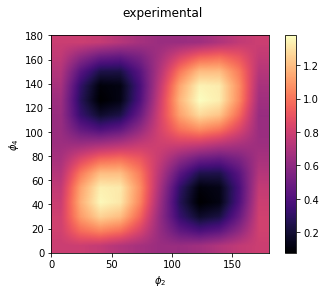

In [4]:
I_experimental=experimental_dict['intensities']
dibujar_2d_fitting(angles_1_e, angles_4_e, I_experimental, title='experimental')

## Parte numérica

In [5]:
#Light source: circular polarization
param_u0, u0 =get_light_parameters()
[amplitude, angle, phase]=param_u0
print(u0)

[[ 3.5431]
 [-0.0246]
 [ 0.0126]
 [ 3.5429]]


In [6]:
pol_dicts=get_polarimeter_parameters(kind='exp')
#real, ideal, exp

pprint.pprint(pol_dicts)

[{'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 0.048659779545601904},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 2.8253389931284207}]


In [7]:
is_polarizer=[True,True, False,True]

P = polarimeter_matrices(pol_dicts, angles=[0,0,0,0])
for i in range(len(P)):
    if is_polarizer[i] is True:
        pprint.pprint(P[i])

#ejemplo de uso
param_u0, u0 =get_light_parameters()

intensity_0, M = polarimeter_matrix(P, is_present=is_polarizer, 
                                    angles=[pol_dicts[0]['theta_axis'],
                                             50*degrees,
                                             0, 
                                             pol_dicts[3]['theta_axis']],
                                            u0=u0)
print(intensity_0)

matrix([[ 0.4456,  0.429 ,  0.    ,  0.    ],
        [ 0.429 ,  0.4456,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.1205,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1205]])
matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]])
matrix([[ 0.4456,  0.429 ,  0.    ,  0.    ],
        [ 0.429 ,  0.4456,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.1205,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1205]])
0.572335774663


0.185218647217


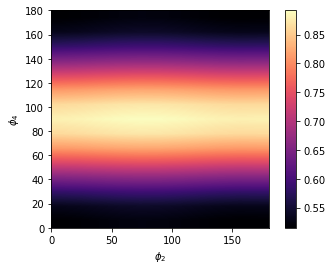

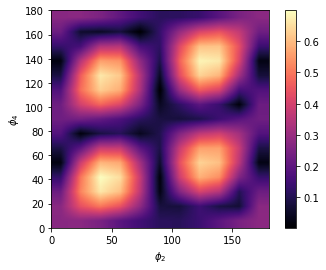

In [8]:
is_polarizer=[True,True, False,True]
Angles_1, Angles_4 = sp.meshgrid(angles_1_e, angles_4_e)
I_numerica=sp.zeros_like(Angles_1, dtype=float)

for i1, angle_1 in enumerate(angles_1_e):
    for i4, angle_4 in enumerate(angles_4_e):
        I_numerica[i4,i1], M = polarimeter_matrix(P, is_present=is_polarizer, 
                                                 angles=[angle_1,45*degrees,0,angle_4], u0=u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_numerica)
dibujar_2d_fitting(angles_1_e, angles_4_e, abs(I_experimental-I_numerica))
print(sp.std(abs(I_experimental-I_numerica)))


##  Ajuste sencillo

Definimos una función que genera la distribución de intensidad, que es la que intentamos optimizar, introducimos los parámetros que ya tenemos conocidos como valores fijos, no se optimizan.

## Definición de funcion de ajuste

In [9]:
[amplitude, angle, phase], u0= get_light_parameters()
print(u0)

[[ 3.5431]
 [-0.0246]
 [ 0.0126]
 [ 3.5429]]


In [10]:
pol_dicts =get_polarimeter_parameters(kind='exp')
pol1,pol2,pol3,pol4 = pol_dicts

pprint.pprint(pol_dicts)

P1_0,P2_0,P3_0,P4_0=polarimeter_matrices(pol_dicts, angles=[0,0,0,0])
pprint.pprint(P1_0)

P1,P2,P3,P4=polarimeter_matrices(pol_dicts, angles=None)
pprint.pprint(P1)


[{'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 0.048659779545601904},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 2.8253389931284207}]
matrix([[ 0.4456,  0.429 ,  0.    ,  0.    ],
        [ 0.429 ,  0.4456,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.1205,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1205]])
matrix([[ 0.4456,  0.427 ,  0.0417,  0.    ],
        [ 0.427 ,  0.4425,  0.0314,  0.    ],
        [ 0.0417,  0.0314,  0.1236,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1205]])


In [11]:
def get_intensity_numerical_simple(par_fitting, angles_1, angles_4, u0):
    """
    par_fitting es sobre la lámina retardadora
    par_fitting = ( a, b, delta, angle_3)
    """
    a, b, delta, angle_2_pol = par_fitting
    
    is_polarizer=[True, True, False, True]
    
    #P1=polarizer_linear(p1=pol1['p0'], p2=pol1['p1'], theta=pol1['theta_axis'])
    P2=diattenuating_retarder(p1=a, p2=b, phase=delta, theta=angle_2_pol)
    print(delta, angle_2_pol)
    #P4=polarizer_linear(p1=pol4['p0'], p2=pol4['p1'], theta=pol4['theta_axis'])
         
    Angles_1, Angles_4 = sp.meshgrid(angles_1, angles_4)
    intensity_numerical=sp.zeros_like(Angles_1, dtype=float)

    for i1, angle_1 in enumerate(angles_1):
        P1_r =rotate_mueller(P1_0, angle_1)
        for i4, angle_4 in enumerate(angles_4):
            P4_r =rotate_mueller(P4_0, angle_4)
            intensity_numerical[i4,i1]= intensity_numerical[i]=intensity(P4_r*P2*P1_r*u0)
            
    return intensity_numerical

In [12]:
par_example=[1,1,90*degrees,39*degrees]
example=get_intensity_numerical_simple(par_example, angles_1_e, 
                                       angles_4_e, u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, example)

1.57079632679 0.680678408278


In [13]:
def err_func(par_error, angles_1_e, angles_4_e, u0,I_experimental):
    I_theory=get_intensity_numerical_simple(par_error, angles_1_e, angles_4_e, u0)
    return (abs(I_theory -I_experimental ).flatten())

has_example=True
if has_example:
    par_example=[1,1, 90*degrees, 40*degrees]
    error=err_func(par_example, angles_1_e, angles_4_e, u0,I_experimental)
    print(error.mean())

1.57079632679 0.698131700798
0.152469088251


In [14]:
err_func1 = lambda par, a1,a4, u0, y: get_intensity_numerical_simple(par, a1,a4, u0)- y
# Distance to the target function

In [15]:
params_1_ini = np.array([1,1,90*degrees,0*degrees]) # Initial guess for the parameters
params_1_fin, success = optimize.leastsq(err_func, params_1_ini, 
                                         args=(angles_1_e, angles_4_e, u0, I_experimental))

1.57079632679 0.0
1.57079632679 0.0
1.57079632679 0.0
1.57079632679 0.0
1.57079632679 0.0
1.5707963502 0.0
1.57079632679 1.49011611939e-08
0.554045878385 0.0257398111843
0.554045878385 0.0257398111843
0.554045878385 0.0257398111843
0.554045886641 0.0257398111843
0.554045878385 0.0257398115679
0.147062339235 0.201020095704
0.147062339235 0.201020095704
0.147062339235 0.201020095704
0.147062341427 0.201020095704
0.147062339235 0.2010200987
0.086930286277 0.169013077161
0.086930286277 0.169013077161
0.086930286277 0.169013077161
0.0869302875723 0.169013077161
0.086930286277 0.169013079679
0.0513402752958 0.169062515215
0.0513402752958 0.169062515215
0.0513402752958 0.169062515215
0.0513402760609 0.169062515215
0.0513402752958 0.169062517734
0.0396902305008 0.168577738148
0.0396902305008 0.168577738148
0.0396902305008 0.168577738148
0.0396902310923 0.168577738148
0.0396902305008 0.16857774066
0.0358732600898 0.168442368252
0.0358732600898 0.168442368252
0.0358732600898 0.168442368252
0.035

In [16]:
print("a={}, b={}, \ndelta={}º, angle={}º".format(params_1_fin[0],params_1_fin[1],
                                              params_1_fin[2]/degrees, params_1_fin[3]/degrees))

a=1.00728271044, b=1.01783328115, 
delta=1.95080312947º, angle=9.64759004184º


0.0340479376674 0.168382211113


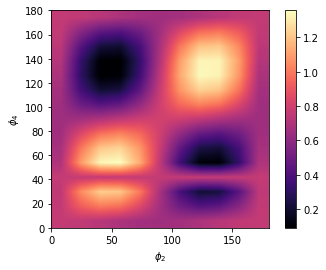

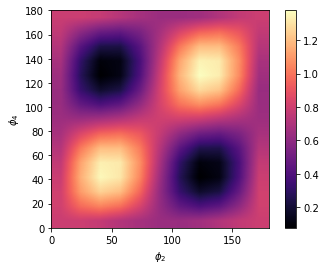

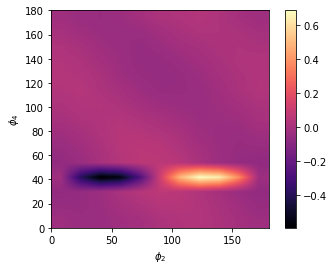

In [17]:
I_best=get_intensity_numerical_simple(params_1_fin, angles_1_e, 
                                       angles_4_e, u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_experimental)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best-I_experimental)

## Fitting to matrices - 2: completo


In [53]:
def get_intensity_numerical_all(par_fitting, angles_1, angles_4, u0):
    """
    par_fitting son los parámetros de optimización, en este caso
        angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting
    """
    
    angle_1_pol, angle_2_pol, angle_4_pol, p1, p0, a, b, delta=par_fitting
    angle_1_pol=0
    a=1
    b=1
    
    P1=polarizer_linear(p1=p1, p2=p0, theta=angle_1_pol)
    P2=diattenuating_retarder(p1=a, p2=b, phase=delta, theta=angle_2_pol)
    P4=polarizer_linear(p1=p1, p2=p0, theta=angle_4_pol)
    is_polarizer=[True, True, False, True]
    
    #P1=polarizer_linear(p1=pol1['p0'], p2=pol1['p1'], theta=pol1['theta_axis'])
  
    Angles_1, Angles_4 = sp.meshgrid(angles_1, angles_4)
    intensity_numerical=sp.zeros_like(Angles_1, dtype=float)

    for i1, angle_1 in enumerate(angles_1):
        P1_r =rotate_mueller(P1, angle_1)
        for i4, angle_4 in enumerate(angles_4):
            P4_r =rotate_mueller(P4, angle_4)
            intensity_numerical[i4,i1]= intensity_numerical[i]=intensity(P4_r*P2*P1_r*u0)
            
    return intensity_numerical


In [54]:
def err_func2(par_error, angles_1, angles_4, u0,I_experimental):
    I_theory=get_intensity_numerical_all(par_error, angles_1, angles_4, u0)
    return (abs(I_theory -I_experimental).flatten())

has_example=True
if has_example:
    params_2_ini=np.array([6*degrees, 6*degrees, 39*degrees, 1,0, 1, 1, 90*degrees])
    error=err_func2(params_2_ini, angles_1_e, angles_4_e, u0,I_experimental)
    print(error.mean())

0.338484637058


In [55]:
params_2_ini=np.array([0*degrees, 6*degrees, 120*degrees, 1,0, 1, 1, 90*degrees])

params_2_fin, success = optimize.leastsq(err_func2, params_2_ini,args=(angles_1_e, angles_4_e, u0, I_experimental))


In [56]:
#  angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting

print("p0={}, p1={}".format(params_2_fin[4],params_2_fin[3]))
print("a={}, b={}, delta={}".format(params_2_fin[5],
                                     params_2_fin[6],
                                     params_2_fin[7]/degrees))

print("theta_1={}, theta_2={}, theta_4={}".format(params_2_fin[0]/degrees, 
                                                  params_2_fin[1]/degrees, 
                                                  params_2_fin[2]/degrees))

print(params_2_fin)

p0=0.00383043884968, p1=0.951072266176
a=1.0, b=1.0, delta=156.642263262
theta_1=0.0, theta_2=-1.0011038902, theta_4=89.6109822277
[ 0.     -0.0175  1.564   0.9511  0.0038  1.      1.      2.7339]


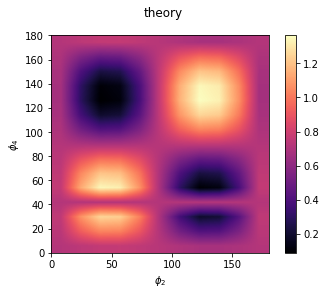

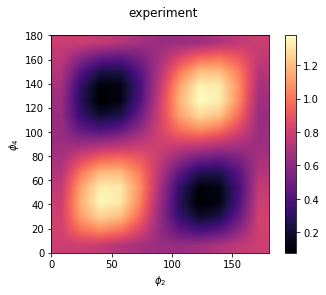

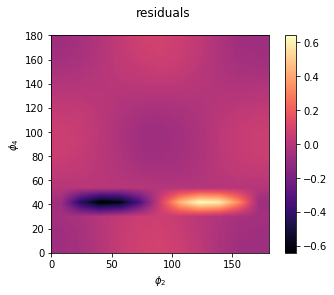

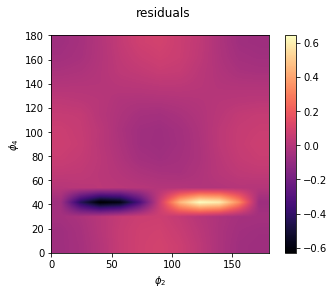

In [57]:
I_best2=get_intensity_numerical_all(params_2_fin, angles_1_e, 
                                       angles_4_e, u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best2, 'theory')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_experimental,'experiment')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best2-I_experimental, 'residuals')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best2-I_experimental*I_best2.max()/I_experimental.max(), 'residuals')

## Fitting to matrices - 2: solo angulos


In [24]:
p1,p2,p3,p4=pol_dicts
pprint.pprint(pol_dicts)

[{'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 0.048659779545601904},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 2.8253389931284207}]


In [48]:
def get_intensity_numerical_angulos(par_fitting, angles_1, angles_4, u0):
    """
    par_fitting son los parámetros de optimización, en este caso
        angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting
    """
    
    angle_1_pol, angle_2_pol, angle_4_pol=par_fitting
   
    P1=polarizer_linear(p1=1, p2=0, theta=angle_1_pol)
    P2=diattenuating_retarder(p1=1, p2=1, phase=90*degrees, theta=angle_2_pol)
    P4=polarizer_linear(p1=1, p2=0, theta=angle_4_pol)
    is_polarizer=[True, True, False, True]
    
    #P1=polarizer_linear(p1=pol1['p0'], p2=pol1['p1'], theta=pol1['theta_axis'])
  
    Angles_1, Angles_4 = sp.meshgrid(angles_1, angles_4)
    intensity_numerical=sp.zeros_like(Angles_1, dtype=float)

    for i1, angle_1 in enumerate(angles_1):
        P1_r =rotate_mueller(P1, angle_1)
        for i4, angle_4 in enumerate(angles_4):
            P4_r =rotate_mueller(P4, angle_4)
            intensity_numerical[i4,i1]= intensity_numerical[i]=intensity(P4_r*P2*P1_r*u0)
            
    return intensity_numerical

In [49]:
def err_func3(par_error, angles_1, angles_4, u0,I_experimental):
    I_theory=get_intensity_numerical_angulos(par_error, angles_1, angles_4, u0)
    return (abs(I_theory -I_experimental).flatten())

has_example=True
if has_example:
    params_3_ini=np.array([6*degrees, 6*degrees, 39*degrees])
    error=err_func3(params_3_ini, angles_1_e, angles_4_e, u0,I_experimental)
    print(error.mean())

0.340481058399


In [50]:
params_3_ini=np.array([0*degrees, 10*degrees, 0*degrees])

params_3_fin, success = optimize.leastsq(err_func3, params_3_ini,args=(angles_1_e, angles_4_e, u0, I_experimental))

In [51]:
print("""theta_1 = {:4.6}º, 
theta_2 = {:4.6}º, 
theta_4 = {:4.6}º""".format(params_3_fin[0]/degrees, 
                    params_3_fin[1]/degrees,params_3_fin[2]/degrees))

theta_1 = 2.40979º, 
theta_2 = 44.9558º, 
theta_4 = 1.63355º


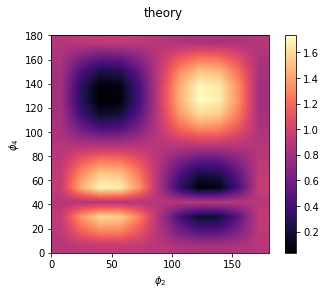

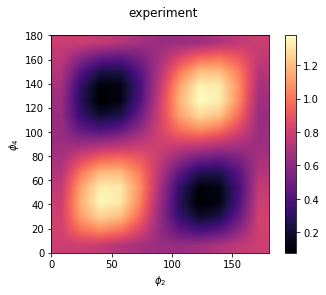

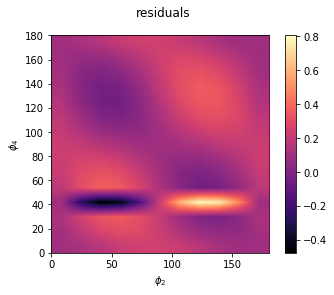

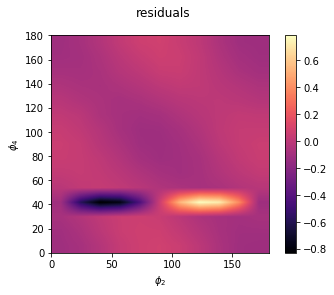

In [52]:
I_best3=get_intensity_numerical_angulos(params_3_fin, angles_1_e, 
                                       angles_4_e, u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best3, 'theory')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_experimental,'experiment')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best3-I_experimental, 'residuals')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best3-I_experimental*I_best3.max()/I_experimental.max(), 'residuals')